In [2]:
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
import re
import matplotlib.pylab as plt

# 1. Grab and process the raw data

In [3]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# 2. Feature engineering:

In [4]:
## Are these words included 
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ', case=False)
    
## Is the message capitalised?
sms_raw['allcaps'] = sms_raw.message.str.isupper()

## Make target boolean
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

# 3. Model preperation:

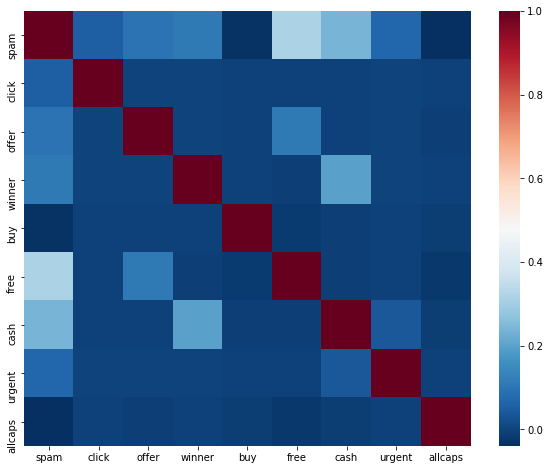

In [8]:
## feature correlation?
plt.figure(figsize=(10,8))
sns.heatmap(sms_raw.corr(), cmap='RdBu_r')
plt.show()

Little or no correlation between feaures

# 4. Naive Bayes model:

In [12]:
# subset data into target and independent variables
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

# instantiate model
bnb = BernoulliNB()

# fit model
bnb.fit(data, target)

# classify
y_pred = bnb.predict(data)

# display results.
print("Number of mislabeled points out of a total {} points : {}".format( data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 5572 points : 604


# 5. More feature engineering:

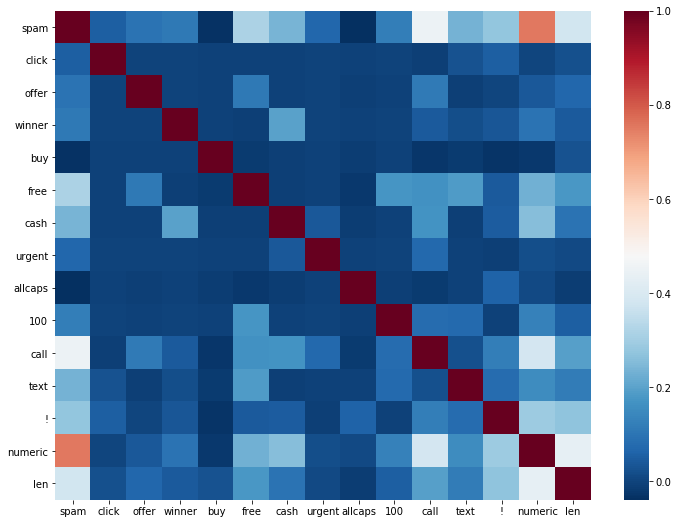

In [6]:
# more keywords
keywords2 = ['100', 'call', 'text']

for key in keywords2:
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ', case=False)

# more feature
    # num of $ in string
sms_raw['!'] = sms_raw.message.str.count(r'\!')

    # num of numeric strings
sms_raw['numeric'] = sms_raw.message.str.findall(r'\d+').str.len()

    # overall num of characters
sms_raw['len'] = sms_raw.message.str.len()
    
# feature correlation?
plt.figure(figsize=(12,9))
sns.heatmap(sms_raw.corr(), cmap='RdBu_r')
plt.show()

# 6. More Naive Bayes modeling:

In [8]:
# subset data into target and independent variables
data = sms_raw[keywords + keywords2 + ['allcaps', '!', 'numeric', 'len']]
target = sms_raw['spam']

# instantiate model
bnb = BernoulliNB()

# fit model
bnb.fit(data, target)

# classify
y_pred = bnb.predict(data)

# display results.
print("Number of mislabeled points out of a total {} points : {}".format( data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 5572 points : 314


Model is 5% more sensitive after adding new features in section 5